# 1. Import library and read Striker player data

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import r2_score
striker = pd.read_csv('striker player.csv')
striker['market_value'] = striker['market_value'] / 1000000 # convert price from usd into milion usds
striker = striker.drop(columns =['Unnamed: 0'])
striker.head()

,league,foot,date,market_value,Apps,Mins,Goals,Assists,Yel,Red,MotM,Rating,age
0,5.0,2.0,2013,0.675,19,1163,3,4,0,0,1,7.21,22
1,5.0,2.0,2014,1.800,31,2155,4,3,0,0,2,7.14,23
2,5.0,2.0,2015,6.300,41,3299,18,12,1,0,10,7.72,24
3,5.0,2.0,2016,27.000,45,3613,10,5,5,0,5,7.01,25
4,5.0,2.0,2017,27.000,36,2961,12,10,2,0,5,7.28,26


In [2]:
y = striker['market_value']
x = striker.drop(columns =['market_value'])
x

,league,foot,date,Apps,Mins,Goals,Assists,Yel,Red,MotM,Rating,age
0,5.0,2.0,2013,19,1163,3,4,0,0,1,7.21,22
1,5.0,2.0,2014,31,2155,4,3,0,0,2,7.14,23
2,5.0,2.0,2015,41,3299,18,12,1,0,10,7.72,24
3,5.0,2.0,2016,45,3613,10,5,5,0,5,7.01,25
4,5.0,2.0,2017,36,2961,12,10,2,0,5,7.28,26
...,...,...,...,...,...,...,...,...,...,...,...,...
4454,3.0,2.0,2017,26,1863,1,2,5,0,0,6.90,22
4455,3.0,2.0,2018,24,2043,2,1,4,0,1,6.80,23
4456,3.0,2.0,2019,28,1882,3,0,2,0,0,6.77,24
4457,3.0,2.0,2020,27,1720,2,6,2,0,0,6.76,25


# 2.Preprocessing data

In [3]:
# Standardization
from sklearn.preprocessing import StandardScaler
def standard_scale(x):
    convert = StandardScaler().fit(x)
    return convert.transform(x)

# Robust sale 
from sklearn.preprocessing import RobustScaler
def robust_scale(x):
    convert = RobustScaler().fit(x)
    return convert.transform(x)
# min_max scaler
from sklearn.preprocessing import MinMaxScaler
def minmax_scale(x):
    convert =  MinMaxScaler().fit(x)
    return convert.transform(x)
# normalize data
from sklearn.preprocessing import normalize
def normalization(x):
    convert =  normalize(x, axis = 0)
    return convert

x = standard_scale(x)
#x = robust_scale(x)
x = minmax_scale(x)
#x = normalization(x)
x

array([[1.        , 0.5       , 0.30769231, ..., 0.02564103, 0.46385542,
        0.25      ],
       [1.        , 0.5       , 0.38461538, ..., 0.05128205, 0.44277108,
        0.29166667],
       [1.        , 0.5       , 0.46153846, ..., 0.25641026, 0.61746988,
        0.33333333],
       ...,
       [0.5       , 0.5       , 0.76923077, ..., 0.        , 0.3313253 ,
        0.33333333],
       [0.5       , 0.5       , 0.84615385, ..., 0.        , 0.32831325,
        0.375     ],
       [0.5       , 0.5       , 0.92307692, ..., 0.02564103, 0.21385542,
        0.41666667]])

# 3.Split training and test 

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state = 3 )

In [5]:
import numpy as np
data_train = pd.DataFrame(x_train, columns = ['league', 'foot','date',  'Apps',  'Mins',  'Goals','Assists', 
                                          'Yel','Red','MotM', 'Rating','age'])
data_train ['market_value'] = np.array(y_train)

data_test = pd.DataFrame(x_test, columns = ['league', 'foot','date',  'Apps',  'Mins',  'Goals','Assists', 
                                          'Yel','Red','MotM', 'Rating','age'])
data_test['market_value'] = np.array(y_test)
data_test

,league,foot,date,Apps,Mins,Goals,Assists,Yel,Red,MotM,Rating,age,market_value
0,0.50,1.0,0.615385,0.076923,0.034059,0.000000,0.000000,0.0000,0.0,0.000000,0.129518,0.166667,0.810
1,1.00,0.0,0.692308,0.089744,0.103506,0.000000,0.037037,0.1250,0.0,0.000000,0.298193,0.291667,4.050
2,0.25,0.5,0.769231,0.205128,0.162485,0.046875,0.111111,0.0625,0.0,0.000000,0.298193,0.500000,10.800
3,0.75,0.0,0.923077,0.089744,0.034723,0.000000,0.000000,0.0000,0.0,0.000000,0.171687,0.250000,0.360
4,0.75,0.5,0.230769,0.166667,0.103339,0.031250,0.074074,0.0625,0.0,0.000000,0.316265,0.208333,4.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0.75,0.5,0.384615,0.256410,0.258182,0.093750,0.111111,0.3750,0.0,0.000000,0.307229,0.416667,3.600
888,1.00,0.0,0.384615,0.512821,0.424655,0.093750,0.037037,0.1250,0.0,0.102564,0.349398,0.083333,0.135
889,0.75,0.0,0.615385,0.448718,0.295232,0.140625,0.074074,0.1875,0.0,0.000000,0.262048,0.333333,9.000
890,0.50,0.0,0.846154,0.461538,0.521515,0.281250,0.111111,0.2500,0.0,0.076923,0.418675,0.250000,3.240


In [6]:
data_train

,league,foot,date,Apps,Mins,Goals,Assists,Yel,Red,MotM,Rating,age,market_value
0,0.00,0.0,0.846154,0.448718,0.443263,0.140625,0.074074,0.1250,0.0,0.051282,0.283133,0.291667,18.00
1,0.25,0.5,0.923077,0.423077,0.386775,0.203125,0.222222,0.1875,0.0,0.153846,0.472892,0.500000,45.00
2,0.50,0.0,0.846154,0.000000,0.010799,0.000000,0.000000,0.0000,0.0,0.000000,0.099398,0.166667,12.15
3,1.00,0.0,0.692308,0.410256,0.393919,0.140625,0.185185,0.6875,0.0,0.076923,0.367470,0.250000,16.20
4,1.00,0.0,0.923077,0.500000,0.406546,0.078125,0.111111,0.3125,0.0,0.051282,0.283133,0.541667,7.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3562,1.00,1.0,0.769231,0.320513,0.232264,0.031250,0.074074,0.0000,0.0,0.000000,0.301205,0.666667,6.30
3563,1.00,0.0,0.923077,0.487179,0.466689,0.015625,0.074074,0.0000,0.0,0.000000,0.219880,0.375000,8.10
3564,0.25,0.0,0.923077,0.423077,0.436451,0.203125,0.185185,0.5625,0.0,0.076923,0.412651,0.458333,9.00
3565,0.00,0.0,0.615385,0.602564,0.500581,0.171875,0.185185,0.2500,0.0,0.000000,0.316265,0.458333,9.00


# 4 .Feature selection for model (Filter method : use correlation matrix)

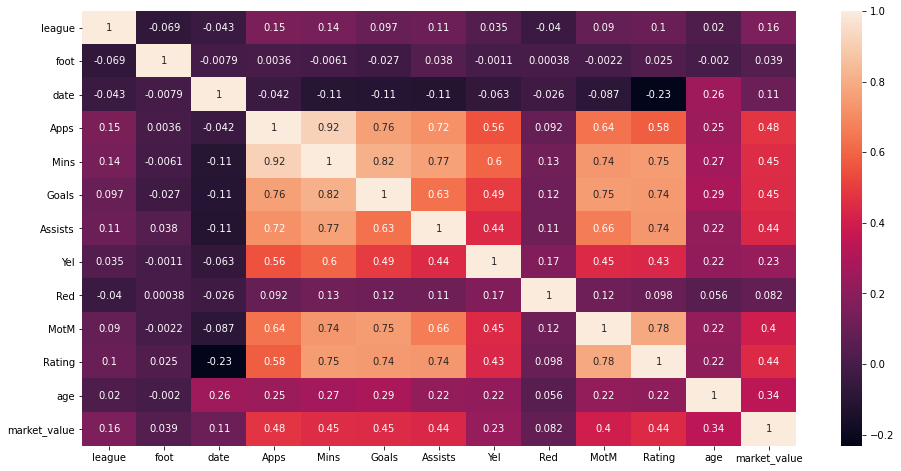

In [7]:
plt.figure(figsize = (16,8));
sns.heatmap(data_train.corr(method = 'spearman'),  annot=True);
# we will remove 2 attributes that have correlation with target < 0.1

# 5. Hyperparameter and Prediction for model
## a. Lasso

In [8]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
regressor = Lasso()
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
          'max_iter': [10000] }
scoring_fnc = 'neg_root_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv= 5 , verbose= 1)
grid.fit(data_train.drop(columns = ['market_value','foot','Red']), data_train['market_value'])

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'max_iter': [10000]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [9]:
grid.best_estimator_.get_params()

{'alpha': 0.001,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [47]:
#  Training model with hyperparameter
#training model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
model = Lasso(alpha = 0.001 , max_iter = 10000)
model.fit(data_train.drop(columns = ['market_value','foot','Red']), data_train['market_value'])
# predict
y_pre = model.predict(data_test.drop(columns = ['market_value','foot','Red']))
# handling the value of striker prediction <  0 :
for i in range(len(y_pre)):
    if y_pre[i] < 0 : 
        y_pre[i] = 1
print('Root mean squred' ,(mean_squared_error(y_pre,y_test )**(1/2)))
print('Root mean absolute' ,(mean_absolute_error(y_pre,y_test )))

Root mean squred 14.444495238767415
Root mean absolute 9.0772628521526


# b. Rigde

In [11]:
from sklearn.linear_model import Ridge
regressor = Ridge()
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
         'fit_intercept' : [True, False]}
scoring_fnc = 'neg_root_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv=5 , verbose= 1)
grid.fit(data_train.drop(columns = ['market_value','foot','Red']), data_train['market_value'])

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'fit_intercept': [True, False]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [12]:
grid.best_estimator_.get_params()

{'alpha': 0.5,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [46]:
model = Ridge(alpha = 0.5, fit_intercept = True)
model.fit(data_train.drop(columns = ['market_value','foot','Red']), data_train['market_value'])
# predict
y_pre = model.predict(data_test.drop(columns = ['market_value','foot','Red']))
# handling the value of striker prediction <  0 :
for i in range(len(y_pre)):
    if y_pre[i] < 0 : 
        y_pre[i] = 1
print('Root mean squred' ,(mean_squared_error(y_pre,y_test )**(1/2)))
print('Root mean absolute' ,(mean_absolute_error(y_pre,y_test )))

Root mean squred 14.430832359717648
Root mean absolute 9.069950874718257


# c . K-nearest Neighbor

In [14]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
regressor =  KNeighborsRegressor()
params = {'n_neighbors':range(1,30) , 'weights' : ['uniform', 'distance'], 
          'metric' : ['euclidean','manhattan','minkowski','chebyshev']}
scoring_fnc = 'neg_root_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv=5 , verbose= 1)
grid.fit(data_train.drop(columns = ['market_value','foot','Red']), data_train['market_value'])

Fitting 5 folds for each of 232 candidates, totalling 1160 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'chebyshev'],
                         'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error', verbose=1)

In [15]:
grid.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 8,
 'p': 2,
 'weights': 'distance'}

In [45]:
# model
model = KNeighborsRegressor(n_neighbors = 8,weights = 'distance', metric = 'manhattan')
#predict
model.fit(data_train.drop(columns = ['market_value','foot','Red']), data_train['market_value'])

y_pre = model.predict(data_test.drop(columns = ['market_value','foot','Red'])) 

print('Root mean squraed' ,(mean_squared_error(y_pre,y_test )**(1/2)))
print('Root mean absolute' ,(mean_absolute_error(y_pre,y_test )))

Root mean squraed 12.708086204205634
Root mean absolute 7.751919894319748
